In [1]:
import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
#from tqdm import tqdm

In [44]:
parameters = {
    'population': 100,
    'steps': 2000,
    'num_partners': 1,
    'mu': 0.6,
    'd':0.6,
    'min_percen':5,
    'number_of_neighbors': 2}



"""CREAMOS EL EDGELIST DEL GRAPH"""


graph = nx.barabasi_albert_graph(parameters['population'], parameters['number_of_neighbors'])
edgelist=pd.DataFrame(graph.edges)
edgelist=edgelist.rename(columns={0:'from',1:'to'})

In [45]:
#creamos una opinion uniformemente distribuida

"""DISTRIBUIMOS UNA OPINION ALEATORIA A LOS NODOS"""
opinion=[]
    
for x in range(len(graph.nodes)):
    opinion.append(random.uniform(0,1))
    
opinion=pd.DataFrame(opinion)#.rename(columns={0:'opinion'})
#opinion.head(5)

# Evolucion temporal de la opinion en la BA network

In [46]:
for x in range(parameters['steps']):


    """creamos otro dataframe que añadiremos en cada bucle con las opiniones actualizadas"""
    
    opinion1=pd.DataFrame()#reseteamos el opinion1 donde cargamos los cambios y los añadimos a opinion
    
    """seleccionamos un nodo y un vecino de ese nodo aleatoriamente"""
    
    nodo=random.choice(pd.DataFrame(graph.nodes)[0])#nodo al azar

    vecinos=pd.concat([edgelist[edgelist['from']==nodo], edgelist[edgelist['to']==nodo]],axis=0)
    indice=random.choice(vecinos.index)
    if int(vecinos[vecinos.index==indice]['from'])==int(nodo):
        vecino=vecinos[vecinos.index==indice]['to']    
    if int(vecinos[vecinos.index==indice]['to'])==int(nodo):
        vecino=vecinos[vecinos.index==indice]['from']

        
    """cogemos la ultima columna y la copiamos, para posteriormente cambiarle la opinion al nodo seleccionado"""
    
    opinion1=pd.DataFrame(opinion[x]) # Última columna)
    #hemos seleccionado vecino al azar 
    
    """definicion de la interacion entre nodos"""
    
    opinion_diff = abs(float(opinion1[opinion1.index == nodo][x].values) - float(opinion1[opinion1.index==int(vecino.values)][x].values))


    if float(opinion_diff) <= parameters['d']:
        opinion_change = parameters['mu'] * (float(opinion1[opinion1.index==nodo][x].values) - float(opinion1[opinion1.index==int(vecino.values)][x].values))
        opinion1.loc[opinion1.index==int(vecino.values),x] = float(opinion1[opinion1.index==int(vecino.values)].values) + opinion_change


    else:
        print('demasiado lejos para interacionar')
    

    """Ahora tenemos que unir el nuevo dataframe con una opinion actualizada al antiguo"""    

    opinion1=opinion1.rename(columns={x:len(opinion.columns)})
    opinion=pd.concat([opinion,opinion1],axis=1)
    #print('nodo   ',nodo,'   vecino   ', int(vecino.values))
    print(x)

0
1
2
3
demasiado lejos para interacionar
4
5
6
7
demasiado lejos para interacionar
8
9
10
demasiado lejos para interacionar
11
12
13
demasiado lejos para interacionar
14
15
16
17
18
19
20
21
22
23
demasiado lejos para interacionar
24
25
26
27
demasiado lejos para interacionar
28
29
30
demasiado lejos para interacionar
31
demasiado lejos para interacionar
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
demasiado lejos para interacionar
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
demasiado lejos para interacionar
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
19

1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932


In [47]:
print('opinion antes   ',float(opinion[opinion.index==int(vecino.values)][0].values),'opinion despues  ',float(opinion1[opinion1.index==int(vecino.values)].values))
print('nodo   ',nodo,'   vecino   ', int(vecino.values))

opinion antes    0.6038463992238959 opinion despues   0.3996465627661742
nodo    53    vecino    83


Text(0.5, 0, 'initial opinion')

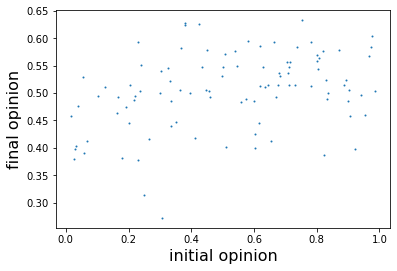

In [48]:
plt.scatter(opinion[0],opinion[parameters['steps']], s=1)
#plt.scatter(opinion[6978],opinion[16977], s=1)

#finalopinion vs initial opinion 
plt.ylabel("final opinion", size = 16)
plt.xlabel("initial opinion", size = 16)
  

In [49]:
opinion

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0.229180,0.229180,0.229180,0.229180,0.229180,0.229180,0.229180,0.229180,0.229180,0.229180,...,0.593774,0.593774,0.593774,0.593774,0.593774,0.593774,0.593774,0.593774,0.593774,0.593774
1,0.352032,0.352032,0.352032,0.352032,0.352032,0.352032,0.352032,0.352032,0.352032,0.352032,...,0.384064,0.384064,0.384064,0.384064,0.384064,0.384064,0.384064,0.384064,0.446898,0.446898
2,0.600353,0.600353,0.600353,0.600353,0.600353,0.600353,0.600353,0.600353,0.600353,0.600353,...,0.485082,0.485082,0.485082,0.485082,0.485082,0.485082,0.485082,0.485082,0.485082,0.485082
3,0.502131,0.502131,0.502131,0.502131,0.502131,0.502131,0.502131,0.502131,0.502131,0.502131,...,0.547903,0.547903,0.547903,0.547903,0.547903,0.547903,0.547903,0.547903,0.547903,0.547903
4,0.249315,0.249315,0.249315,0.249315,0.249315,0.249315,0.249315,0.249315,0.249315,0.249315,...,0.314343,0.314343,0.314343,0.314343,0.314343,0.314343,0.314343,0.314343,0.314343,0.314343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.379263,0.456739,0.456739,0.456739,0.456739,0.456739,0.456739,0.456739,0.456739,0.456739,...,0.628532,0.628532,0.628532,0.628532,0.628532,0.628532,0.628532,0.628532,0.628532,0.628532
96,0.976918,0.976918,0.976918,0.976918,0.976918,0.976918,0.976918,0.976918,0.976918,0.976918,...,0.603210,0.603210,0.603210,0.603210,0.603210,0.603210,0.603210,0.603210,0.603210,0.603210
97,0.836284,0.836284,0.836284,0.836284,0.836284,0.836284,0.836284,0.836284,0.836284,0.836284,...,0.499399,0.499399,0.499399,0.499399,0.499399,0.499399,0.499399,0.499399,0.499399,0.499399
98,0.411363,0.411363,0.411363,0.411363,0.411363,0.411363,0.411363,0.411363,0.411363,0.411363,...,0.417340,0.417340,0.417340,0.417340,0.417340,0.417340,0.417340,0.417340,0.417340,0.417340


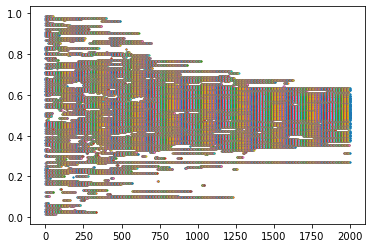

In [50]:
for x in range(len(opinion.columns)):
    A=[]
    for i in range(len(opinion)):
        A.append(x)
    plt.scatter(A,opinion[x], s=1)


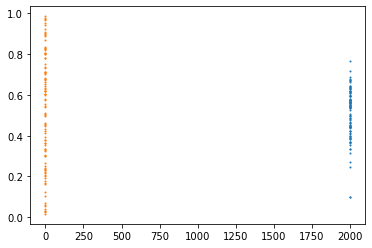